In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [111]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [112]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.Year.nunique()

34

In [6]:
gdp_df.shape

(8219, 4)

In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [191]:
GDP_per_Capita_df = gdp_df.drop(columns = ['Value Footnotes'])
GDP_per_Capita_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [192]:
GDP_per_Capita_df = GDP_per_Capita_df.rename(columns={'Country or Area':'Country','Year':'year','Value':'GDP_Per_Capita'})

In [ ]:
## other way to rename coloumns
## GDP_per_Capita.columns =['Country','year','GDP_Per_Capita']

In [193]:
GDP_per_Capita_df

,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [194]:
GDP_per_Capita_df['year'].nunique()

34

In [198]:
country_count = GDP_per_Capita_df['Country'].value_counts().reset_index()

In [199]:
country_count.columns = ['Country','Count']

In [200]:
country_count

,Country,Count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [201]:
len(country_count.loc[country_count.Count == GDP_per_Capita_df.year.nunique()])

228

In [202]:
country_count.loc[country_count.Count != GDP_per_Capita_df.year.nunique()].Country.to_list()

['Lebanon',
 'Tonga',
 'Bhutan',
 'Syrian Arab Republic',
 'Somalia',
 'Greenland',
 'West Bank and Gaza',
 'Serbia',
 'Montenegro',
 'San Marino',
 'CuraÃ§ao',
 'Afghanistan',
 'Virgin Islands',
 'Cayman Islands',
 'Faroe Islands',
 'Kosovo',
 'Sint Maarten (Dutch part)',
 'Turks and Caicos Islands',
 'Djibouti']

In [203]:
len(country_count.loc[country_count.Count != GDP_per_Capita_df.year.nunique()])

19

<Axes: xlabel='year'>

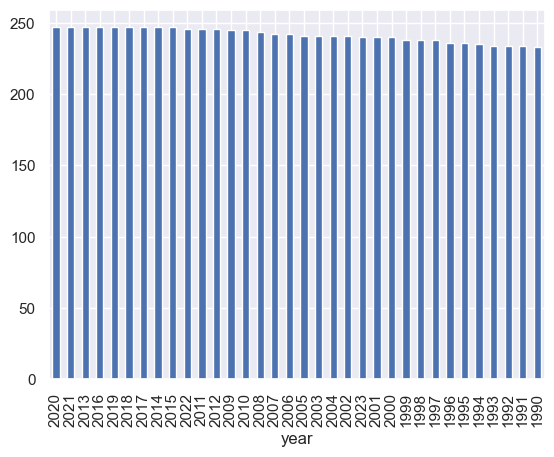

In [205]:
GDP_per_Capita_df.year.value_counts().plot(kind = 'bar')
## most recent has more measures than the older ones


In [ ]:
## if you want to get a number of countries use len().

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [206]:
GDP_per_Capita_df.head()

,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [207]:
gdp_2020 = GDP_per_Capita_df.loc[GDP_per_Capita['year'] == 2020]

In [22]:
gdp_2020.head()

,Country,year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


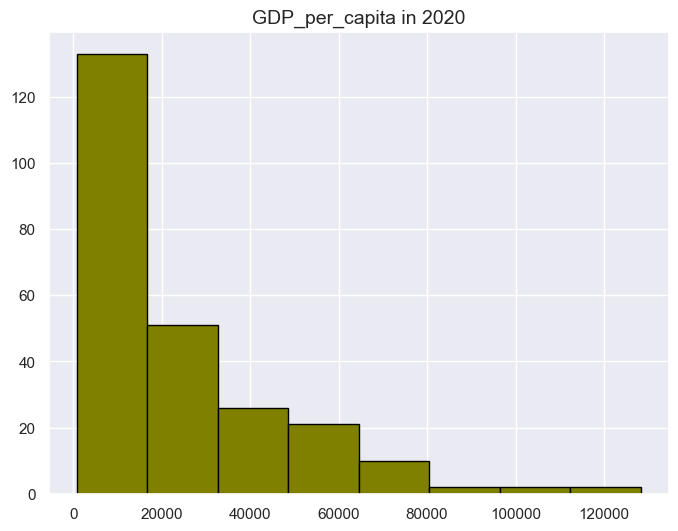

In [208]:
gdp_2020['GDP_Per_Capita'].hist(bins =8 ,color = 'olive',edgecolor = 'black',figsize = (8,6))
plt.title('GDP_per_capita in 2020',fontsize  = 14);
### This chart is left skewed.

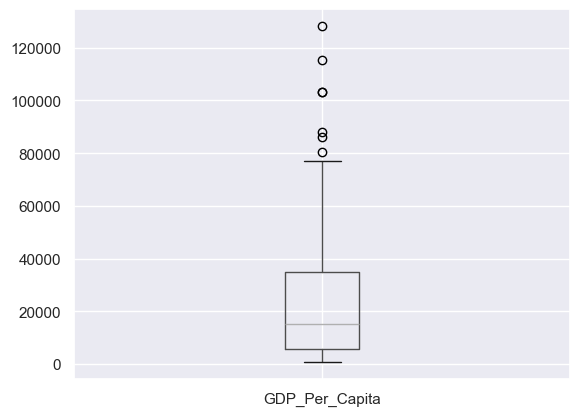

In [209]:
gdp_2020.boxplot('GDP_Per_Capita');


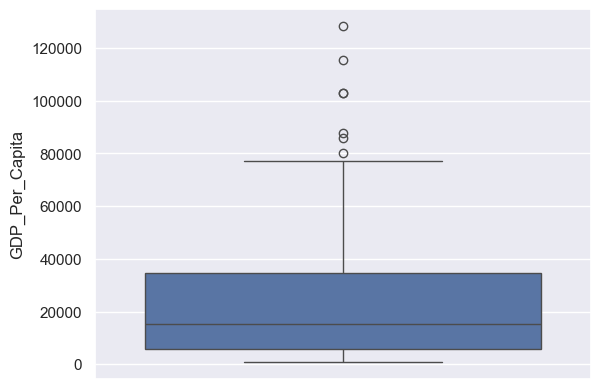

In [210]:
sns.boxplot(data = gdp_2020,y= 'GDP_Per_Capita');

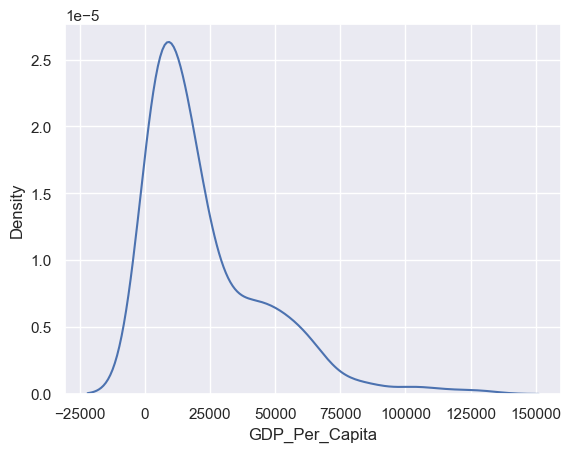

In [211]:
sns.kdeplot( data = gdp_2020,x= 'GDP_Per_Capita');
### its a logritham 100% of data this fit in the line.

### we can see boxplot gives the outliers info.

### A violin plot allows you to visualize the distribution of a numeric variable for one or several groups.
##  It allows to compare distributions from one group to another.

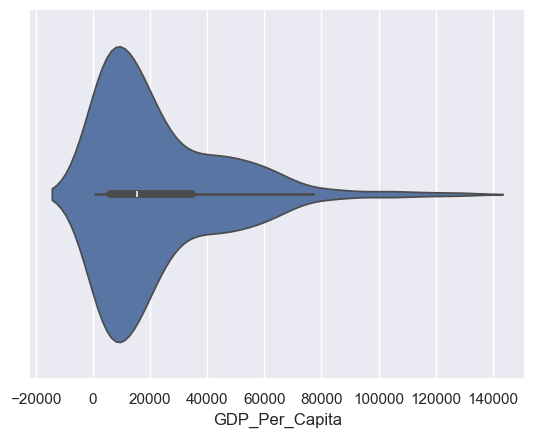

In [212]:
sns.set_theme(style="darkgrid")
sns.violinplot(x=gdp_2020 ['GDP_Per_Capita'])
plt.show();

### 9. What was the median GDP per capita value in 2020?

In [213]:
gdp_2020['GDP_Per_Capita'] .median()

15309.23598817024

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [214]:
GDP_per_Capita_df


,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [178]:
decades=[1990,2000,2010,2020]

In [215]:
gdp_decades = GDP_per_Capita_df.loc[GDP_per_Capita['year'].isin(decades)]

In [183]:
gdp_decades.head()

,Country,year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


In [216]:
gdp_decades = gdp_decades.reset_index(drop = True)
gdp_decades.shape

(965, 3)

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

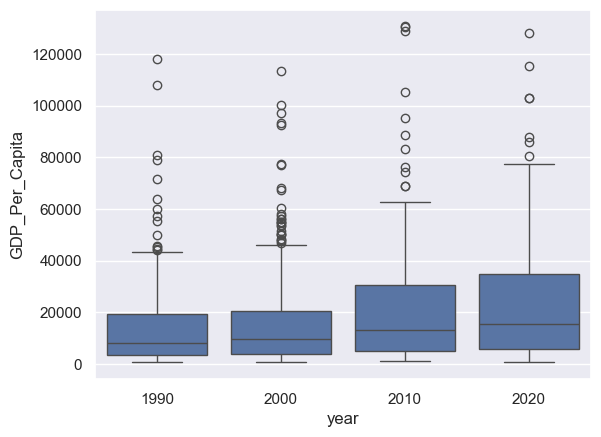

In [217]:
sns.boxplot(data = gdp_decades,x= 'year', y= 'GDP_Per_Capita')
## 

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

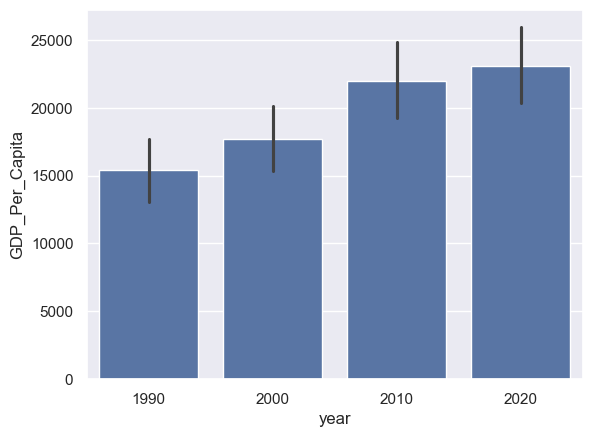

In [218]:
sns.barplot (x = 'year', y ='GDP_Per_Capita',data =gdp_decades)
## black lines are error bars.

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

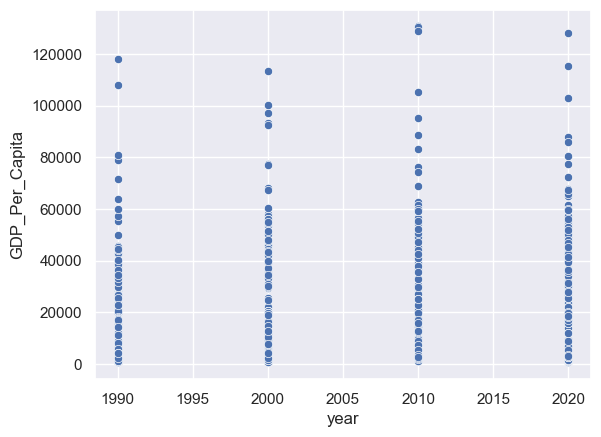

In [219]:
sns.scatterplot(data = gdp_decades,x = "year",y = "GDP_Per_Capita")
## each dot is the one observation.

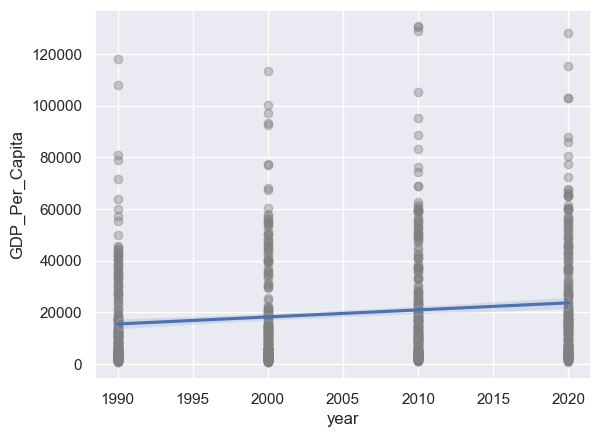

In [220]:
sns.regplot(data = gdp_decades,x = "year",y = "GDP_Per_Capita",scatter_kws= {'color':'grey','alpha' :0.4});
## color get the darker more dennsity there.

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

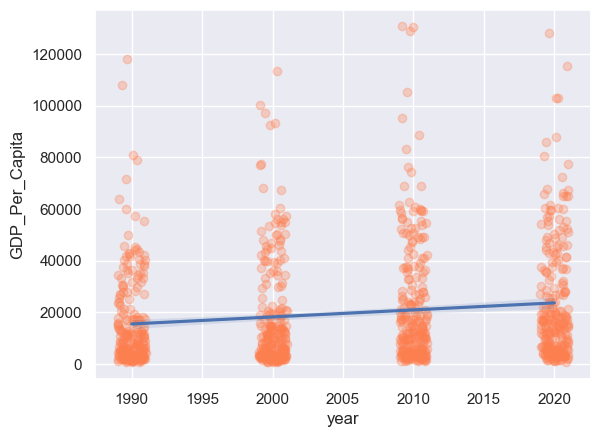

In [221]:
sns.regplot(data = gdp_decades,x = "year",y = "GDP_Per_Capita",scatter_kws= {'color':'coral','alpha' :0.3},x_jitter =True)

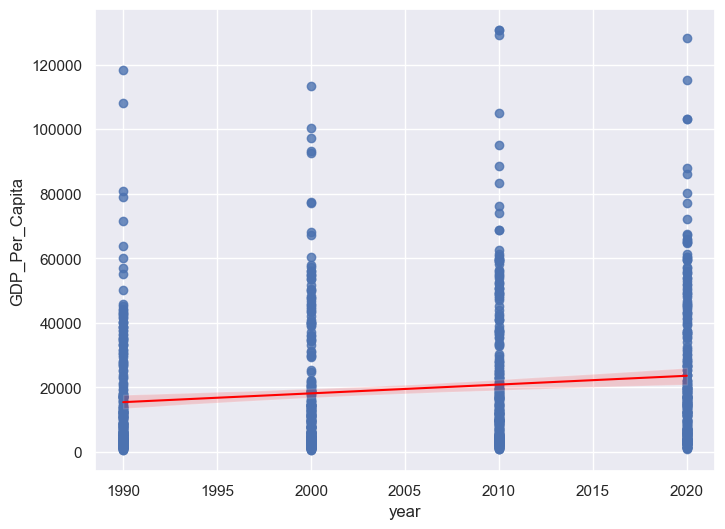

In [222]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
ax=ax
)
plt.show()

### 11. Which country was the first to have a GDP per capita greater than $100,000?


In [233]:
GDP_per_Capita_df.loc[GDP_per_Capita_df.GDP_Per_Capita > 100000].sort_values('year').head(2).Country

974                   Brunei
7827    United Arab Emirates
Name: Country, dtype: object

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [239]:
top_country = gdp_2020.sort_values('GDP_Per_Capita',ascending = False).Country.head(1)
top_country

4426    Luxembourg
Name: Country, dtype: object

In [244]:
top_over_time = GDP_per_Capita_df.loc[GDP_per_Capita_df.Country.isin(top_country )]


(0.0, 140665.11597513943)

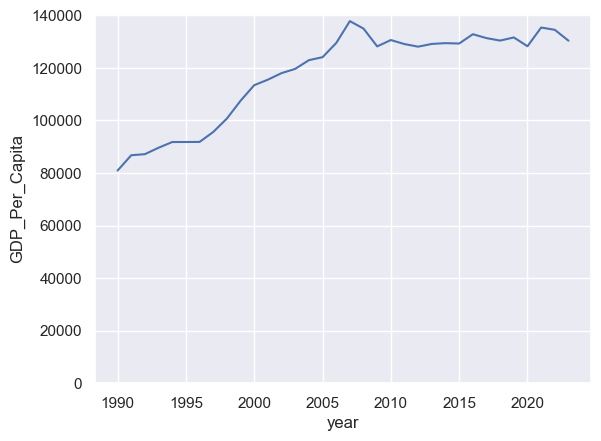

In [245]:
sns.lineplot(data= top_over_time,x ='year',y = 'GDP_Per_Capita')
plt.ylim(bottom = 0)


In [252]:
lowest_gdp = gdp_2020.sort_values('GDP_Per_Capita').Country.head(1)

In [255]:
lowest_over_time = GDP_per_Capita_df.loc[GDP_per_Capita_df.Country.isin(lowest_gdp)]


(0.0, 1466.1674858591664)

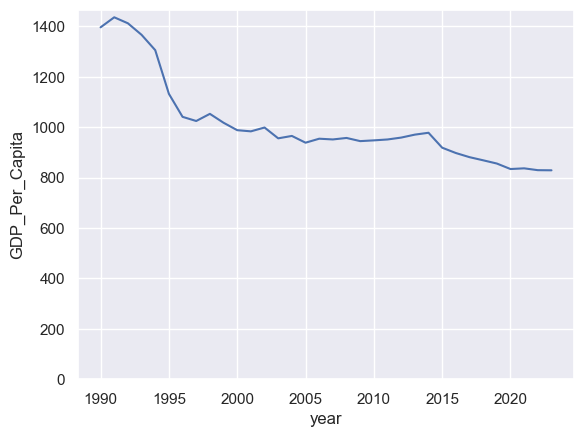

In [257]:
sns.lineplot(data = lowest_over_time,x = 'year',y = 'GDP_Per_Capita')
plt.ylim(bottom =0)

In [46]:
internet_df = pd.read_csv("../data/internet_use.csv",nrows =6083)
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [47]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [48]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [49]:
internet_df.tail()

,Country or Area,Year,Value
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [50]:
internet_df.columns =['Country','Year','Internet_Users_Pct']

In [51]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [52]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [53]:
internet_df.Year.value_counts()

Year
1990    226
2007    217
2002    214
2008    214
2009    214
2011    214
2001    212
2006    212
2005    212
2000    210
2004    210
2012    209
2010    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2020    186
2021    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

### 17. What is the first year to have a non-zero internet users percentage value?

In [54]:
first_year = internet_df.loc[internet_df.Internet_Users_Pct >0]['Year'].min()
first_year

1990

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [258]:
internet_years =[ 2000,2014]

In [262]:
internet_2000_14 = internet_df.loc[internet_df.year.isin(internet_years)]

<Axes: >

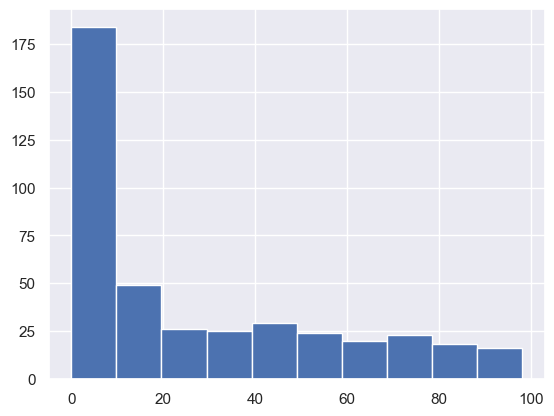

In [264]:
internet_2000_14['Internet_Users_Pct'].hist()

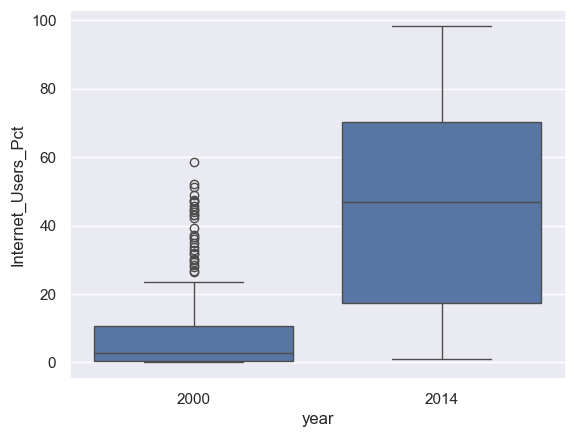

In [267]:
sns.boxplot(data = internet_2000_14,x = 'year', y='Internet_Users_Pct');

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [60]:
len(year_2014.loc[year_2014.Internet_Users_Pct<5])/len(year_2014)*100




4.901960784313726

In [61]:
internet_below_5_2014 = year_2014.loc[year_2014.Internet_Users_Pct<5]
internet_below_5_2014


,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [62]:
internet_df = internet_df.rename(columns ={ 'Year' : 'year'})
internet_df

,Country,year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [63]:
GDP_per_Capita

,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [64]:
gdp_and_internet_use = pd.merge(GDP_per_Capita,internet_df, on = ['Country','year'])


In [65]:
gdp_and_internet_use.head()

,Country,year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2927.245144,17.60
1,Afghanistan,2018,2902.392113,16.80
2,Afghanistan,2017,2952.998916,13.50
3,Afghanistan,2016,2958.785399,11.00
4,Afghanistan,2015,2967.692067,8.26


In [66]:
gdp_and_internet_use.tail()

,Country,year,GDP_Per_Capita,Internet_Users_Pct
4798,Zimbabwe,1997,4304.406272,0.033080
4799,Zimbabwe,1996,4271.479930,0.016790
4800,Zimbabwe,1995,3935.280057,0.007684
4801,Zimbabwe,1994,3965.730986,0.001739
4802,Zimbabwe,1990,4013.299059,0.000000


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [72]:
top_3 = year_2014.sort_values(by ='Internet_Users_Pct',ascending =False).Country.head(3)


2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
Name: Country, dtype: object

In [74]:
top_3_gdp = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_3)]

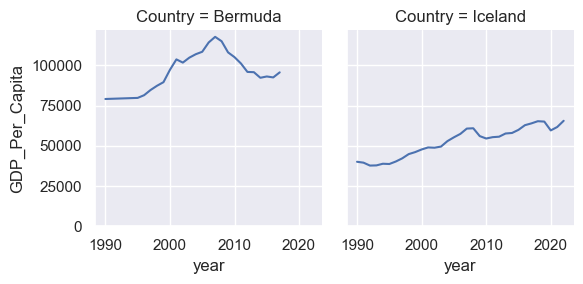

In [91]:
g =sns.FacetGrid(top_3_gdp ,col = 'Country' )
g.map(sns.lineplot, "year", "GDP_Per_Capita");
plt.ylim(bottom =0);

#### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [84]:
gdp_and_internet_use_2014 =  gdp_and_internet_use.loc[gdp_and_internet_use.year == 2014]
gdp_and_internet_use_2014.head()


,Country,year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,3017.942544,7.0000
27,Albania,2014,12788.747231,54.3000
56,Algeria,2014,15073.762940,29.5000
85,Andorra,2014,59929.244467,86.1000
112,Angola,2014,10250.592404,21.3623


#### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

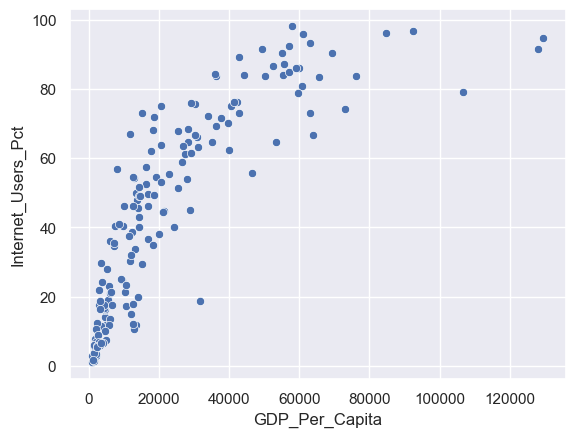

In [93]:
sns.scatterplot(data = gdp_and_internet_use_2014,x= 'GDP_Per_Capita',y = 'Internet_Users_Pct')

#### its increasing then flating around 100 %.definitly there are related.

#### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [100]:
gdp_per_capita_2014 = GDP_per_Capita.loc[GDP_per_Capita.year == 2014]
gdp_per_capita_2014.head()

,Country,year,GDP_Per_Capita
9,Afghanistan,2014,3017.942544
33,Africa Eastern and Southern,2014,4052.851526
67,Africa Western and Central,2014,4816.917355
101,Albania,2014,12788.747231
135,Algeria,2014,15073.762940


In [109]:
pd.cut(gdp_per_capita_2014.GDP_Per_Capita,bins = 3,labels=['low', 'medium', 'high'])

9       low
33      low
67      low
101     low
135     low
       ... 
8074    low
8096    low
8126    low
8160    low
8194    low
Name: GDP_Per_Capita, Length: 247, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']